In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy.stats import levene
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

survival:    Survival 
PassengerId: Unique Id of a passenger. 
pclass:    Ticket class     
sex:    Sex     
Age:    Age in years     
sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation

In [3]:
df = pd.read_csv('test.csv')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df1 = pd.read_csv('train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data=pd.concat([df1,df],axis=0,join='outer',sort=False)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
#fare of each class for each embarkment point
data.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [9]:
# replacing the missing values with 'C'
data['Embarked'].fillna('C', inplace=True)

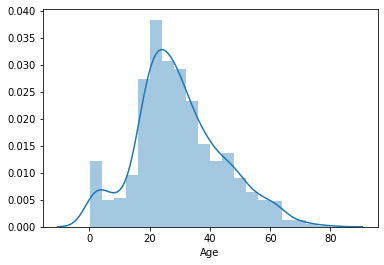

In [13]:
#check the distribution of age
sns.distplot(data['Age'].dropna(),bins=20)

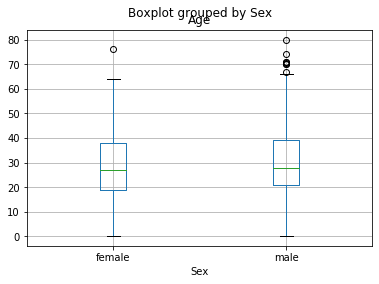

In [16]:
data[data.Age.notnull()].boxplot('Age','Sex');

In [10]:
#replacing with median of age
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Age'].isnull().sum()

0

In [11]:
#replacing with median of fare
data['Fare'].fillna(data['Fare'].median(),inplace=True)
data['Fare'].isnull().sum()

0

In [12]:
#percentage of cabin missing values
data['Cabin'].isnull().sum()/data['Cabin'].isnull().count()*100

77.46371275783041

In [13]:
#since there are lot of Nan values -77% in Cabin we drop it
data.drop(columns = ['Cabin'],inplace=True)

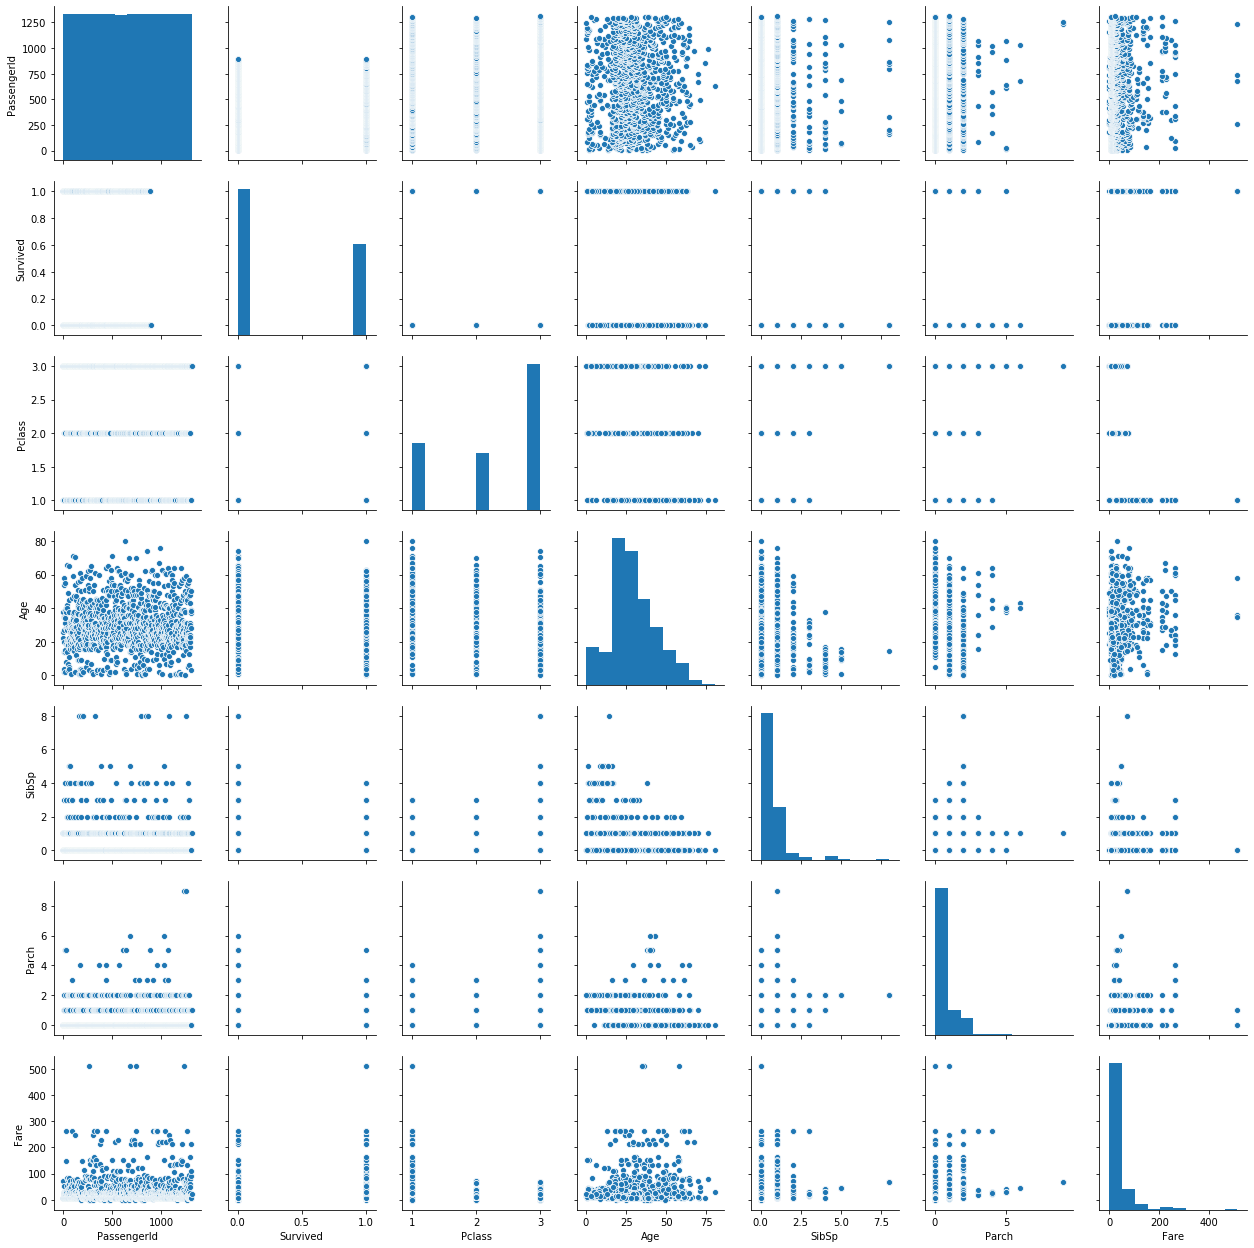

In [49]:
#checking the overall relationship with Survived
#sns.pairplot(data)

In [14]:
le = LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])

In [15]:
data['Sex'].value_counts()

1    843
0    466
Name: Sex, dtype: int64

PassengerId       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Survived       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Pclass         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Sex               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Age            AxesSubplot(0.398529,0.391471;0.227941x0.222059)
SibSp          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Parch                AxesSubplot(0.125,0.125;0.227941x0.222059)
Fare              AxesSubplot(0.398529,0.125;0.227941x0.222059)
Embarked          AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

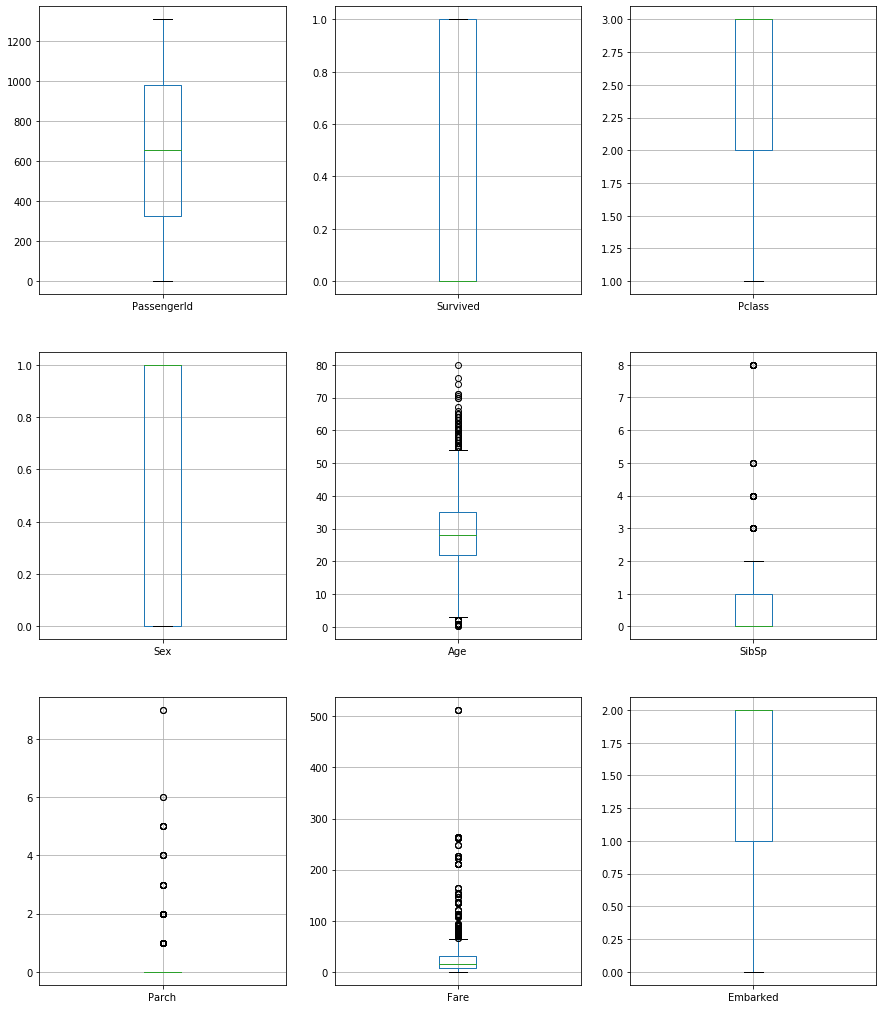

In [66]:
data.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False,grid=True,figsize=(15,18)) 

In [16]:
dftrain = data.iloc[:891,:] 
dftest = data.iloc[891:,:] 

In [17]:
dftrain.shape,dftest.shape 

((891, 11), (418, 11))

In [18]:
dftest.isnull().sum() 

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [19]:
data.columns  

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [20]:
x = dftrain.drop(columns = ['PassengerId','Survived','Name','Ticket']) 
y = dftrain['Survived'] 

In [35]:
m1 = LogisticRegression()
knn = KNeighborsClassifier() 
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
NB = GaussianNB()
bag = BaggingClassifier(n_estimators=10)
adaboost = AdaBoostClassifier(n_estimators=50)
adaboost_rf = AdaBoostClassifier(base_estimator=RF,n_estimators=50)
grad = GradientBoostingClassifier(n_estimators=58)

In [36]:
models = []
models.append(('Logistic Regression',m1))
models.append(('KNN',knn))
models.append(('Decision Tree',DT))
models.append(('Random Forrest',RF))
models.append(('GaussianNB',NB))
models.append(('Bagged DT',bag))
models.append(('Ada Boost DT',adaboost))
models.append(('Ada boost Random Forrest',adaboost_rf))
models.append(('Gradient boosting',grad))

In [37]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
    auc = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='roc_auc')
    results.append(auc)
    names.append(name)
    print('%s: %f' % (name,np.mean(auc*100)))
    BE =1-np.mean(auc)#Bias error
    VE =np.var(1-auc,ddof=1)#variance error
    print("\t\tBais error : ", BE)
    print("\t\tVariance error: ",VE)

Logistic Regression: 85.295219
		Bais error :  0.14704780872561707
		Variance error:  0.0008309067708803612
KNN: 73.784350
		Bais error :  0.2621564969669983
		Variance error:  0.0013612038197262776
Decision Tree: 77.363345
		Bais error :  0.22636655476230272
		Variance error:  0.0008378708885838782
Random Forrest: 84.216813
		Bais error :  0.15783187321678638
		Variance error:  0.0016773042021190406
Bagged DT: 85.194639
		Bais error :  0.14805361395174488
		Variance error:  0.0005018271611929002
Ada Boost DT: 85.083899
		Bais error :  0.14916101436080997
		Variance error:  0.0010236992820019215
Ada boost Random Forrest: 84.354602
		Bais error :  0.1564539763531545
		Variance error:  0.0003715382198250379
Gradient boosting: 87.264230
		Bais error :  0.12735770196785157
		Variance error:  0.0012339608414794528


In [33]:
from sklearn.model_selection import RandomizedSearchCV
# grid search
n_estimators = range(1, 100)
param_grid = dict(n_estimators=n_estimators)
r_search = RandomizedSearchCV(grad, param_grid,scoring="neg_log_loss", n_jobs=-1, cv=5)
r_search.fit(x,y)

C:\Users\Ranganathan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                     

In [34]:
r_search.best_params_

{'n_estimators': 58}

In [38]:
grad.fit(x,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=58,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [72]:
x1 = dftest.drop(columns = ['PassengerId','Survived','Name','Ticket']) 
y1 = dftest['Survived']

In [73]:
y_pred = grad.predict(x1)
y_pred.shape

(418,)

In [74]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_pred,y[:418])
cm

array([[168, 116],
       [ 87,  47]], dtype=int64)

In [78]:
df_1['Survived'] = y_pred
df_1.head()

,Survived
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [85]:
a=dftest['PassengerId']
df_final = pd.concat([a,df_1],axis=1,join='outer')
df_final

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
5,897,0.0
6,898,1.0
7,899,0.0
8,900,1.0
9,901,0.0


In [86]:
df_final.shape

(418, 2)

In [87]:
df_final.to_csv('submission1.csv')

-> Gradient boosting is the best model with 87% accuracy.

In [116]:
dfsub = pd.read_csv('submission1.csv')
dfsub.drop(columns='Unnamed: 0',inplace=True)

# PCA:

In [63]:
x = dftrain.drop(columns = ['PassengerId','Survived','Name','Ticket']) 
y = dftrain['Survived']

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_std=sc.fit_transform(x)

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95,svd_solver = 'full')
principalComponents = pca.fit_transform(x_std)
xpca = pd.DataFrame(data = principalComponents)

In [69]:
#cross val score
for model,name in zip([m1,knn,NB,DT,RF,grad],['LogisticRegression','KNeighborsClassifier','GaussianNB','Decision_tree','Random_Forrest','Gradientboosting']):
    auc = model_selection.cross_val_score(model,xpca,y,cv=5,scoring='roc_auc')
    BE =1-np.mean(auc)#Bias error
    VE =np.var(auc,ddof=1)#variance error
    print(name)
    print("\t\tBais error : ", BE)
    print("\t\tVariance error: ",VE)
    print("\tF1 score:",np.mean(auc))

LogisticRegression
		Bais error :  0.1503195402249814
		Variance error:  0.0001687748534390781
	F1 score: 0.8496804597750186
KNeighborsClassifier
		Bais error :  0.15521575239952023
		Variance error:  0.0012640049681659912
	F1 score: 0.8447842476004798
GaussianNB
		Bais error :  0.16440389014147205
		Variance error:  0.0007771505161407073
	F1 score: 0.835596109858528
Decision_tree
		Bais error :  0.26477176561599003
		Variance error:  0.0023333922512357554
	F1 score: 0.73522823438401
Random_Forrest
		Bais error :  0.1781103711746148
		Variance error:  0.0017969955392765956
	F1 score: 0.8218896288253852
Gradientboosting
		Bais error :  0.15091053250541986
		Variance error:  0.0017302572342704661
	F1 score: 0.8490894674945801


> Since pca is giving less accuracy we consider the model we did without pca.